In [1]:
import os
import sys
from collections import defaultdict

import pydicom
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Get the raw data from the zip file and 

In [2]:
!mkdir ./dcm_scratch
!rm ./dcm_scratch/*
!cp /mnt/ml4cvd/projects/bulk/cardiac_mri/1000387_20208_2_0.zip ./dcm_scratch/
!unzip ./dcm_scratch/1000387_20208_2_0.zip -d ./dcm_scratch/

mkdir: cannot create directory ‘./dcm_scratch’: File exists
Archive:  ./dcm_scratch/1000387_20208_2_0.zip
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473313221477960.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473316091377964.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473326134877981.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473338403377994.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473310163377956.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473298724177935.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473318919377968.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473322683277973.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473345825278003.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217473299587677937.dcm  
  inflating: ./dcm_scrat

  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471666798877794.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471641319177757.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471636693577751.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471644576377761.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471632108777738.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471652404077773.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471678290977803.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471631672877737.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471636210377749.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471653844977775.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.2.18.141243.2018011217471660697277789.dcm  
  inflating: ./dcm_scratch/1.3.12.2.1107.5.

Now separate the 3 views of the long axis.  There should a 2 chamber view (cine_segmented_lax_2ch), a 3 chamber view (cine_segmented_lax_3ch) and a 4 chamber view (cine_segmented_lax_4ch).  Each view has 50 instances covering the cardiac cycle from that perspective.

In [3]:
dcm_dir = './dcm_scratch/'
series = defaultdict(list)
for dcm_file in os.listdir(dcm_dir):
    if not dcm_file.endswith('.dcm'):
        continue
    dcm = pydicom.read_file(dcm_dir + dcm_file)
    if 'cine_segmented_lax' in dcm.SeriesDescription.lower():
        series[dcm.SeriesDescription.lower()].append(dcm)
for k in series:
    print(f'Long axis series {k} has {len(series[k])} instances')

Long axis series cine_segmented_lax_4ch has 50 instances
Long axis series cine_segmented_lax_3ch has 50 instances
Long axis series cine_segmented_lax_2ch has 50 instances


In [10]:
def plot_lax(series, transpose=False, size=18):
    cols = 2
    rows = 25
    _, axes = plt.subplots(rows, cols, figsize=(size, size))
    for dcm in series:
        col = (dcm.InstanceNumber-1)%cols
        row = (dcm.InstanceNumber-1)//cols
        if transpose:
            axes[row, col].imshow(dcm.pixel_array.T)
        else:
            axes[row, col].imshow(dcm.pixel_array, cmap='gray')
        axes[row, col].set_yticklabels([])
        axes[row, col].set_xticklabels([])

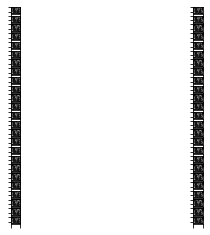

In [11]:
plot_lax(series['cine_segmented_lax_4ch'])

In [ ]:
plot_lax(series['cine_segmented_lax_3ch'], transpose=True)

In [ ]:
plot_lax(series['cine_segmented_lax_2ch'], transpose=True)